# Predict Diabetes

Dataset ini berasal dari National Institute of Diabetes and Digestive and Kidney Diseases dan digunakan untuk memprediksi apakah seorang pasien menderita diabetes. Dataset ini terdiri dari data pasien perempuan keturunan Indian Pima yang berusia minimal 21 tahun. Dataset mencakup beberapa variabel medis sebagai fitur prediktor (independen), dan satu variabel target (dependen), yaitu Outcome yang menunjukkan apakah pasien menderita diabetes atau tidak.



Link dataset  : https://www.kaggle.com/datasets/whenamancodes/predict-diabities

In [92]:
# Import library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping

In [93]:
# Load dataset dan menampilkan 5 data teratas
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [94]:
# Menampilkan informasi tentang dataset (df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Preprocessing

Dilakukan untuk menyiapkan data agar lebih bersih, relevan, dan sesuai format yang dibutuhkan, sehingga hasil analisis atau prediksi menjadi lebih akurat dan efisien.

In [95]:
# Cek nilai yang hilang (null)
print("Jumlah nilai null:")
print(df.isnull().sum())

Jumlah nilai null:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [96]:
#Cek nilai yang duplikat
jumlah_duplikat = df.duplicated().sum()
print("Jumlah baris duplikat:", jumlah_duplikat)


Jumlah baris duplikat: 0


In [97]:
# Cek nilai yang sama dengan 0 sebelum
print("Cek nilai sama dengan 0 sebelum:")
print((df == 0).sum())

Cek nilai sama dengan 0 sebelum:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [98]:
# Mengganti nilai 0 pada kolom dengan nilai median dari masing-masing kolom, karena 0 pada kolom tersebut dianggap sebagai nilai tidak valid secara medis
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df[col] = df[col].replace(0, df[col].median())

In [99]:
# Cek nilai yang sama dengan 0 sesudah
print("Cek nilai sama dengan 0 sesudah:")
print((df == 0).sum())

Cek nilai sama dengan 0 sesudah:
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [100]:
# Memisahkan fitur (X) dan target (y).
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [101]:
# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [102]:
# Membagi data menjadi data latih dan data uji (90% - 10%).
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=75)

## Pelatihan Model MLP
MLP (Multilayer Perceptron) adalah proses di mana jaringan saraf belajar dari data untuk mengenali pola dan membuat prediksi. Dalam hal ini, model digunakan untuk memprediksi apakah seseorang mengidap diabetes.

In [103]:
# Membuat model
model = Sequential([
    Dense(64, activation='relu', input_shape=(8,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
# Callback untuk early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [105]:
# Kompilasi dan latih model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'
])

In [106]:
# Latih model dengan early stopping
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6554 - loss: 0.6536 - val_accuracy: 0.6547 - val_loss: 0.5809
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6825 - loss: 0.5701 - val_accuracy: 0.7626 - val_loss: 0.5082
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7147 - loss: 0.5492 - val_accuracy: 0.7842 - val_loss: 0.4841
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7239 - loss: 0.5247 - val_accuracy: 0.7842 - val_loss: 0.4728
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7470 - loss: 0.5162 - val_accuracy: 0.7842 - val_loss: 0.4634
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7305 - loss: 0.4817 - val_accuracy: 0.7842 - val_loss: 0.4560
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7444 - loss: 0.4762 - val_accuracy: 0.7698 - val_loss: 0.4517
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7530 - loss: 0.4961 - val_accuracy: 0.7842 - val_loss

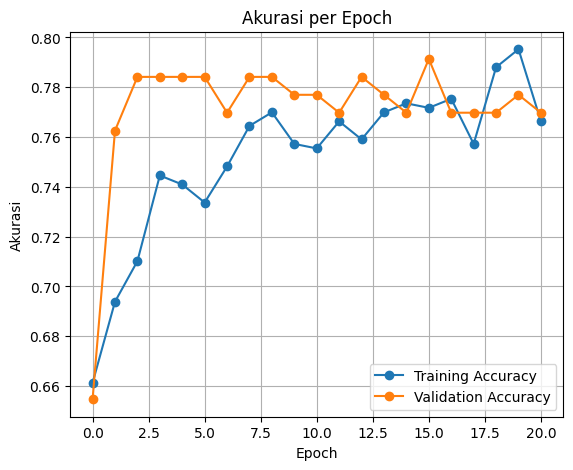

In [107]:
# Grafik Akurasi
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Akurasi per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)

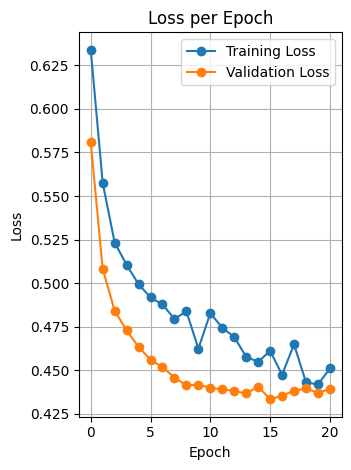

In [108]:
# Grafik Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [109]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi pada data test: {accuracy:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8062 - loss: 0.5124
Akurasi pada data test: 0.83


## Prediksi Data

In [114]:
# Prediksi pada data baru
data_baru = [[2, 120, 90, 20, 79, 14, 5, 90]]
data_baru_scaled = scaler.transform(data_baru)
prediksi_prob = model.predict(data_baru_scaled)
prediksi = (prediksi_prob > 0.5).astype("int32")

if prediksi[0][0] == 1:
    print("Prediksi: Terkena diabetes 😟")
else:
    print("Prediksi: Tidak terkena diabetes 🙂")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Prediksi: Terkena diabetes 😟


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
